## Run to create slurm job

model_path = [path to .json template]
%run [path to l1analysis_notebook.ipynb]

In [18]:
model_path = '/data00/projects/geoscan_v2/scripts/L1/model_images-GEO.json'
%run '/data00/projects/geoscan_v2/scripts/L1/l1analysis_notebook.ipynb'


Using template study-geoscanR01-GEO.json: GEoscan R01 default pipeline
	6mm FWHM smoothing
	No global scaling
	FAST correlation
	x_trans, y_trans, z_trans, x_rot, y_rot, z_rot, csf, trash regressor (FD > 0.75 | GS > 3 SD)
Using template task_images_GEO.json: Geoscan Image Task
----
Processing 8 participants:
['GEO015', 'GEO033', 'GEO036', 'GEO037', 'GEO053', 'GEO061', 'GEO067', 'GEO071']
----
GEO015 : job created
GEO033 : job created
GEO036 : job created
GEO037 : job created
GEO053 : job created
GEO061 : job created
GEO067 : job created
GEO071 : job created
----
To test drive one job (sub-GEO071), copy and paste the following lines in terminal:

singularity run --cleanenv \
  -B /data00/projects/geoscan_v2/scripts/L1/l1analysis_SPM.py:/worker.py \
  -B /data00/projects/geoscan_v2:/data \
  -B /data00/projects/geoscan_v2/data/bids_data/derivatives/nipype:/output \
  -B /data00/projects/geoscan_v2/data/bids_data/working/nipype:/working \
  -B /data00/projects/geoscan_v2/models/task-image

In [28]:
def show_DM(spm_file):
    import os
    import matplotlib.pylab as plt
    import pandas as pd
    import scipy.io as sio
    from nistats import reporting
    
    %matplotlib inline 
    
    if not os.path.exists(spm_file):
        print('Cannot find SPM.mat file')
        return False
    
    spm_mat=sio.loadmat(spm_file, 
               squeeze_me=True, struct_as_record=False)
    
    DM = spm_mat['SPM'].xX.X
    regressor_labels = spm_mat['SPM'].xX.name
    
    design_matrix = pd.DataFrame(DM, columns=regressor_labels)
    fig,ax = plt.subplots(figsize=(10,16))
    reporting.plot_design_matrix(design_matrix, ax=ax, rescale=True)
    plt.show()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: 

 | Using Nistats with Nilearn versions >= 0.7.0 is redundant and potentially conflicting.
 | Nilearn versions 0.7.0 and up offer all the functionality of Nistats as well the latest features and fixes.
 | We strongly recommend uninstalling Nistats and using Nilearn's stats & reporting modules.

  
/usr/local/anaconda3/lib/python3.7/site-packages/nilearn/datasets/__init__.py:90: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


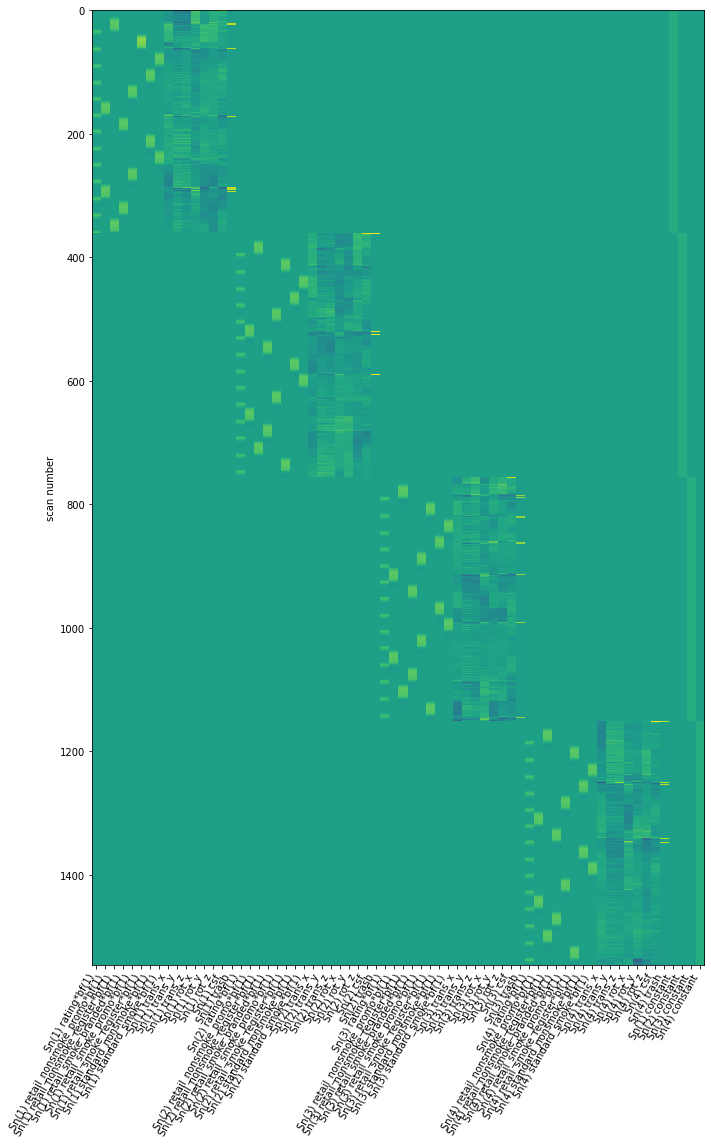

In [29]:
show_DM('/data00/projects/geoscan_v2/data/bids_data/derivatives/nipype/task-image_model-condition/sub-GS017/SPM.mat')